In [1]:
import os

import yaml
from PIL import Image
import torch
import numpy as np

from modules import *
from visprog import ProgramRunner

/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/diffusers/utils/outputs.py:63: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


In [2]:
eval_ = Eval()
replace = Replace(device='cuda:1' if torch.cuda.is_available() else 'cpu')
result_ = Result()
seg = Seg(device='cpu')
select = Select(seg.model.config.id2label, seg.model.config.label2id, device='cpu')
vqa = VQA(device='cpu')

/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/diffusers/pipelines/pipeline_utils.py:270: FutureWarning: You are loading the variant fp16 from runwayml/stable-diffusion-inpainting via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
unet/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/transformers/models/maskformer/image_processing_maskformer.py:411: FutureWarning: The `size_divisibility` argument is deprecated and will be removed in v4.27. Please use `size_divisor` instead.
  warnings.warn(
/home/ahmadsa/anaconda3/envs/visprog/lib/python3.11/site-packages/transformers/models/maskformer/

In [3]:
modules = [eval_, replace, result_, seg, select, vqa]

In [4]:
program_runner = ProgramRunner(modules)

In [23]:
def do_imgedit(image: Image, program: str):
  initial_state = {
    'IMAGE': image,
  }
  steps, result = program_runner.execute_program(program, initial_state)
  return steps, result

def do_nlvr(left_image: Image, right_image: Image, program: str):
  initial_state = {
    'LEFT': left_image,
    'RIGHT': right_image,
  }
  steps, result = program_runner.execute_program(program, initial_state)
  return steps, result

In [37]:
with open('assets/fig4/imgedit_prompts.yaml', 'r') as f:
  prompts = yaml.safe_load(f)

In [7]:
images_dir = 'assets/fig4'

Replace the ground with with white snow and the bear with a white polar bear


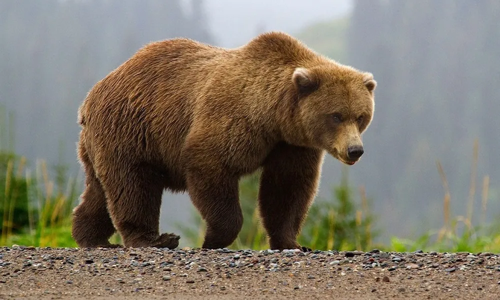

In [38]:
prompt = prompts[0]
instruction = prompt['prompt']['instruction']
image = Image.open(os.path.join(images_dir, prompt['image'])).convert('RGB')
print(instruction)
image.resize((image.size[0] // 2, image.size[1] // 2))

OBJ0 = SEG(image=IMAGE)
OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='bear', category=None)
OBJ2 = SELECT(image=IMAGE, object=OBJ0, query='ground', category=None)
IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white polar bear')
IMAGE1 = REPLACE(image=IMAGE0, object=OBJ2, prompt='white snow')
FINAL_RESULT = RESULT(var=IMAGE1)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

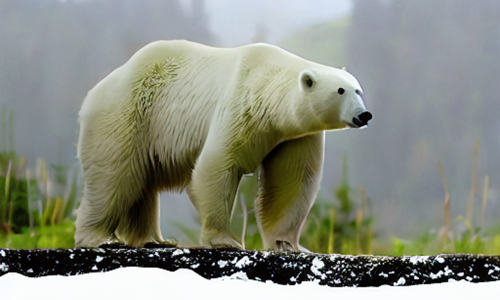

In [9]:
program = prompt['programs'][0]
print(program)
steps, result = do_imgedit(image, program)
result.output['var'].resize((image.size[0] // 2, image.size[1] // 2))

In [10]:
result.output['var'].save(os.path.join(images_dir, f'{prompt["id"]}_result0.png'))

'OBJ0 = SEG(image=IMAGE)'

'grass'

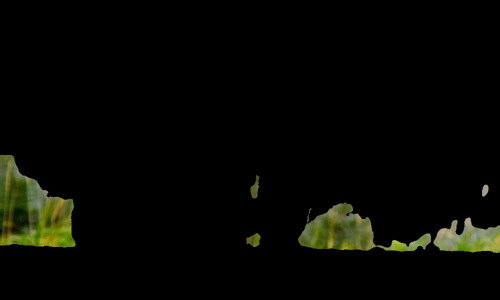

'earth, ground'

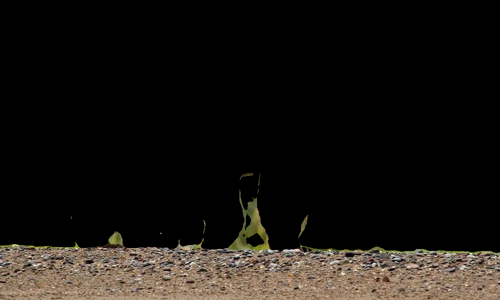

'mountain, mount'

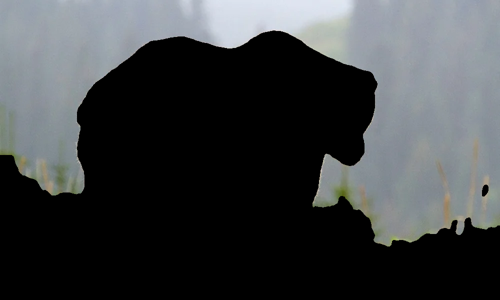

'water'

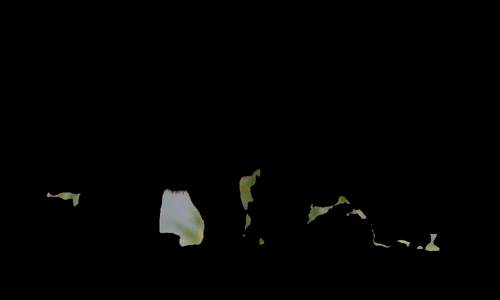

'animal'

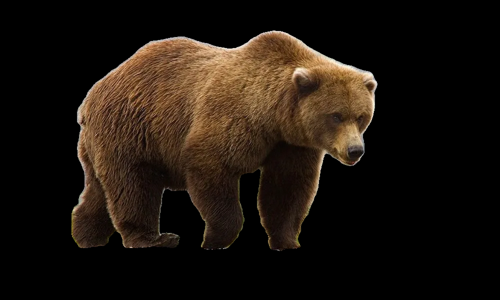

In [11]:
labels = [select.category_id_to_name[x] for x in np.unique(result.state['OBJ0'])]
display(steps[0], *sum([[label, i.resize((image.size[0] // 2, image.size[1] // 2))] for label, i in zip(labels, result.step_details[0]['output'])], []))

OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='bear', category=None)


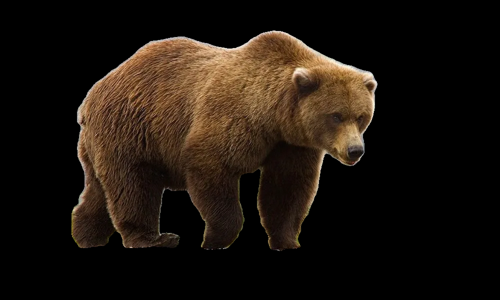

In [12]:
print(steps[1])
result.step_details[1]['output'].resize((image.size[0] // 2, image.size[1] // 2))

OBJ2 = SELECT(image=IMAGE, object=OBJ0, query='ground', category=None)


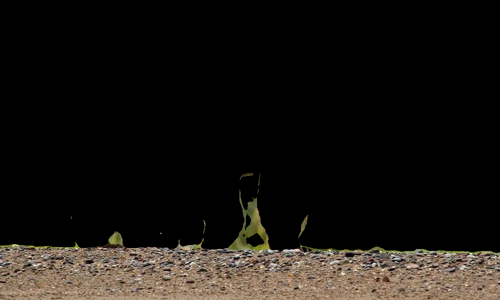

In [13]:
print(steps[2])
result.step_details[2]['output'].resize((image.size[0] // 2, image.size[1] // 2))

IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white polar bear')


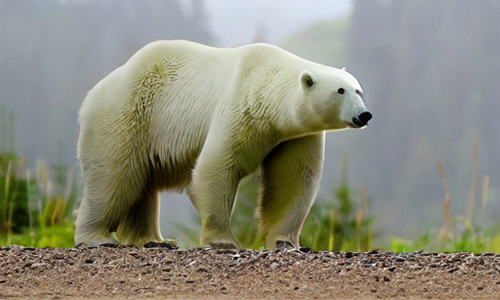

In [14]:
print(steps[3])
result.step_details[3]['output'].resize((image.size[0] // 2, image.size[1] // 2))

OBJ0 = SEG(image=IMAGE)
OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='ground', category=None)
OBJ2 = SELECT(image=IMAGE, object=OBJ0, query='bear', category=None)
IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white snow')
IMAGE1 = REPLACE(image=IMAGE0, object=OBJ2, prompt='white polar bear')
FINAL_RESULT = RESULT(var=IMAGE1)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

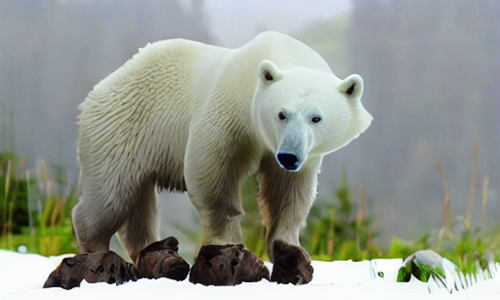

In [77]:
program = prompt['programs'][1]
print(program)
steps, result = do_imgedit(image, program)
result.output['var'].resize((image.size[0] // 2, image.size[1] // 2))

In [78]:
result.output['var'].save(os.path.join(images_dir, f'{prompt["id"]}_result1.png'))

'OBJ0 = SEG(image=IMAGE)'

'grass'

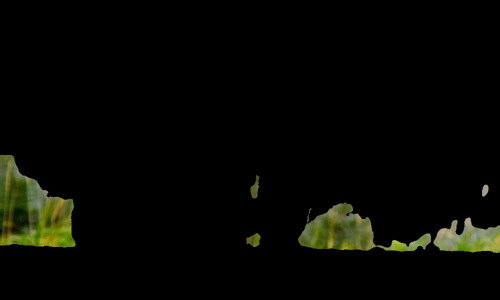

'earth, ground'

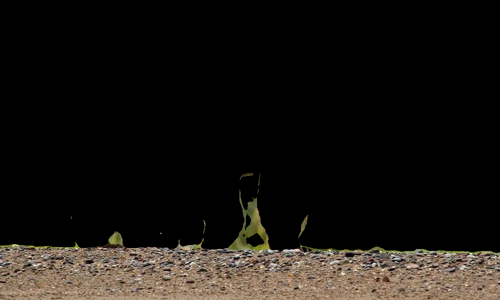

'mountain, mount'

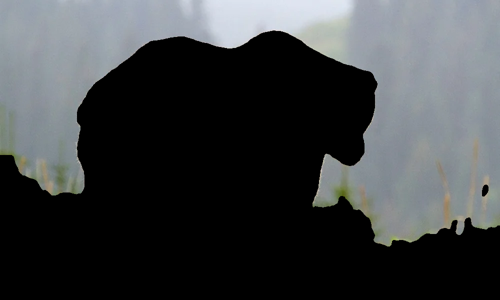

'water'

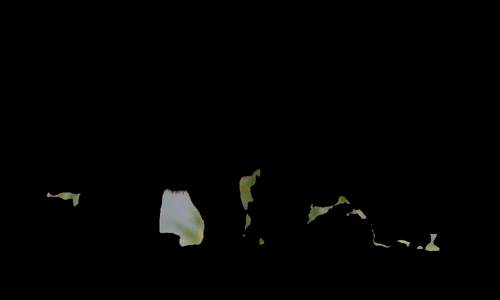

'animal'

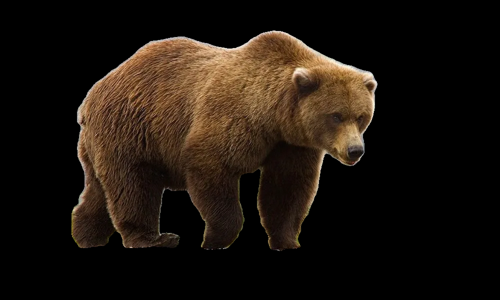

In [79]:
labels = [select.category_id_to_name[x] for x in np.unique(result.state['OBJ0'])]
display(steps[0], *sum([[label, i.resize((image.size[0] // 2, image.size[1] // 2))] for label, i in zip(labels, result.step_details[0]['output'])], []))

OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='ground', category=None)


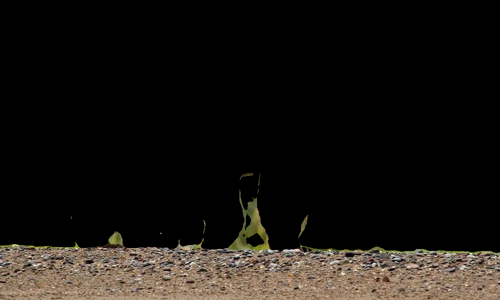

In [80]:
print(steps[1])
result.step_details[1]['output'].resize((image.size[0] // 2, image.size[1] // 2))

OBJ2 = SELECT(image=IMAGE, object=OBJ0, query='bear', category=None)


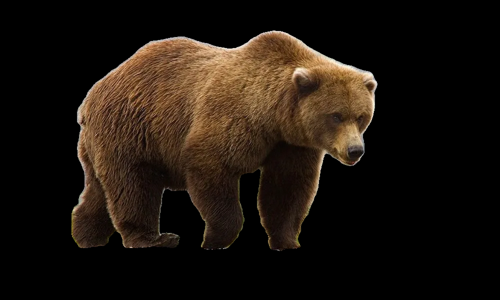

In [81]:
print(steps[2])
result.step_details[2]['output'].resize((image.size[0] // 2, image.size[1] // 2))

IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white snow')


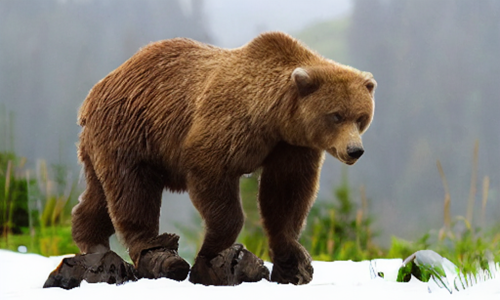

In [82]:
print(steps[3])
result.step_details[3]['output'].resize((image.size[0] // 2, image.size[1] // 2))

OBJ0 = SEG(image=IMAGE)
OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='ground,bear', category=None)
IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white snow, white polar bear')
FINAL_RESULT = RESULT(var=IMAGE0)


  0%|          | 0/50 [00:00<?, ?it/s]

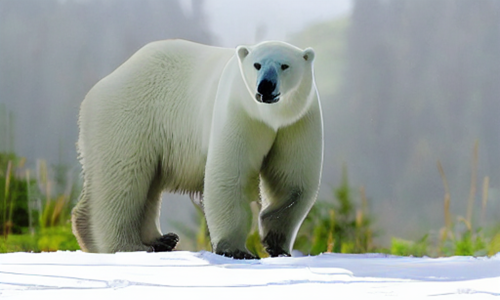

In [83]:
program = prompt['programs'][2]
print(program)
steps, result = do_imgedit(image, program)
result.output['var'].resize((image.size[0] // 2, image.size[1] // 2))

In [84]:
result.output['var'].save(os.path.join(images_dir, f'{prompt["id"]}_result2.png'))

'OBJ0 = SEG(image=IMAGE)'

'grass'

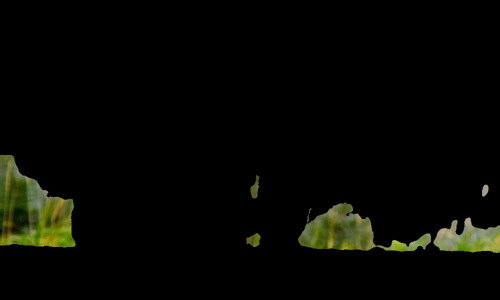

'earth, ground'

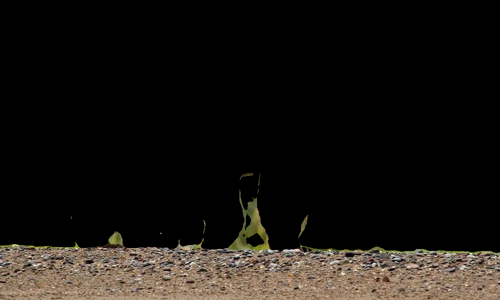

'mountain, mount'

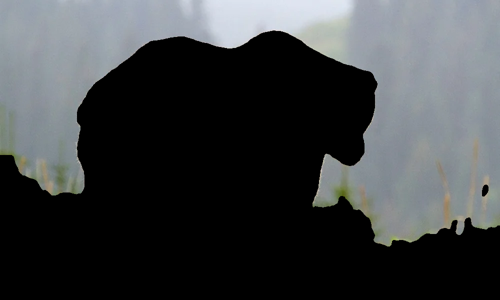

'water'

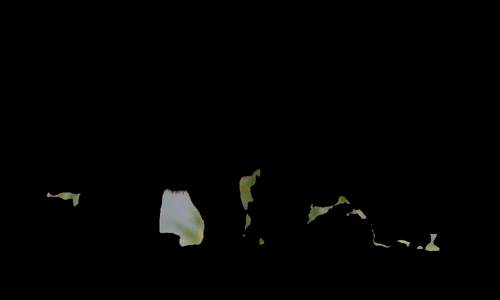

'animal'

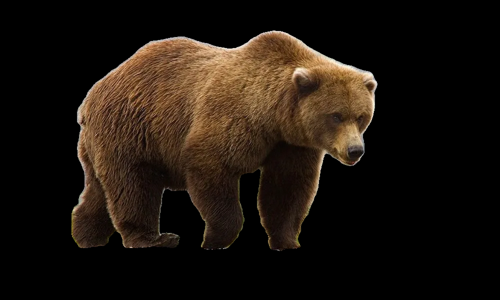

In [85]:
labels = [select.category_id_to_name[x] for x in np.unique(result.state['OBJ0'])]
display(steps[0], *sum([[label, i.resize((image.size[0] // 2, image.size[1] // 2))] for label, i in zip(labels, result.step_details[0]['output'])], []))

OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='ground,bear', category=None)


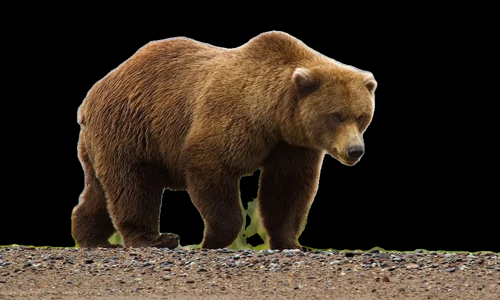

In [86]:
print(steps[1])
result.step_details[1]['output'].resize((image.size[0] // 2, image.size[1] // 2))

IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white snow, white polar bear')


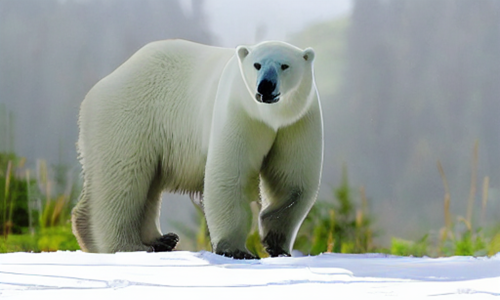

In [87]:
print(steps[2])
result.step_details[2]['output'].resize((image.size[0] // 2, image.size[1] // 2))

OBJ0 = SEG(image=IMAGE)
OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='bear', category=None)
IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white polar bear')
OBJ2 = SEG(image=IMAGE0)
OBJ3 = SELECT(image=IMAGE0, object=OBJ2, query='ground', category=None)
IMAGE1 = REPLACE(image=IMAGE0, object=OBJ3, prompt='white snow')
FINAL_RESULT = RESULT(var=IMAGE1)


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

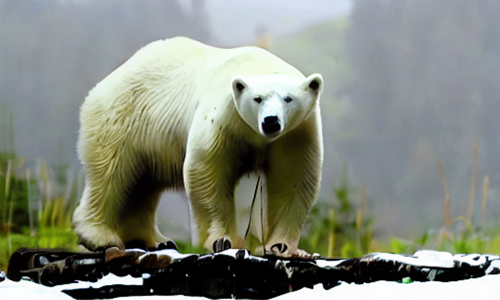

In [68]:
program = prompt['programs'][3]
print(program)
steps, result = do_imgedit(image, program)
result.output['var'].resize((image.size[0] // 2, image.size[1] // 2))

In [69]:
result.output['var'].save(os.path.join(images_dir, f'{prompt["id"]}_result3.png'))

'OBJ0 = SEG(image=IMAGE)'

'grass'

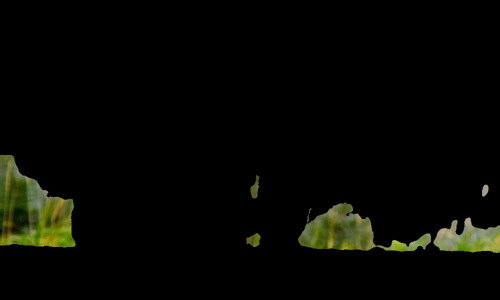

'earth, ground'

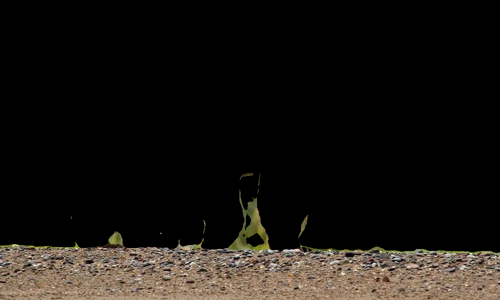

'mountain, mount'

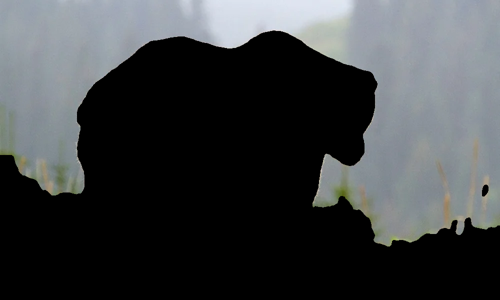

'water'

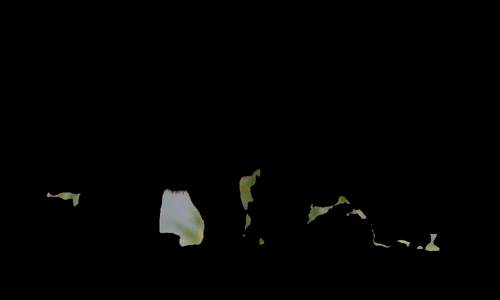

'animal'

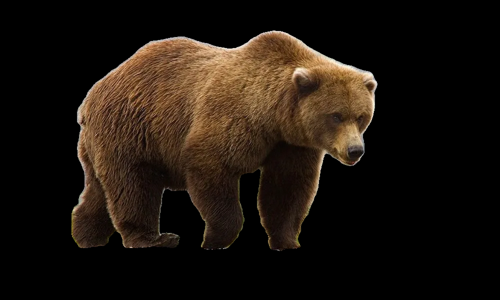

In [70]:
labels = [select.category_id_to_name[x] for x in np.unique(result.state['OBJ0'])]
display(steps[0], *sum([[label, i.resize((image.size[0] // 2, image.size[1] // 2))] for label, i in zip(labels, result.step_details[0]['output'])], []))

OBJ1 = SELECT(image=IMAGE, object=OBJ0, query='bear', category=None)


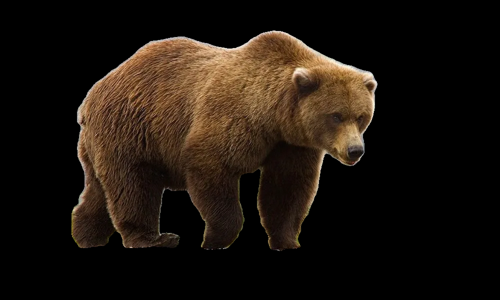

In [71]:
print(steps[1])
result.step_details[1]['output'].resize((image.size[0] // 2, image.size[1] // 2))

IMAGE0 = REPLACE(image=IMAGE, object=OBJ1, prompt='white polar bear')


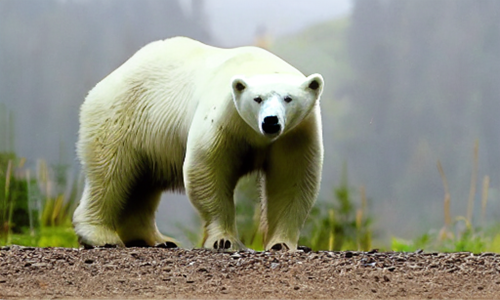

In [72]:
print(steps[2])
result.step_details[2]['output'].resize((image.size[0] // 2, image.size[1] // 2))

'OBJ2 = SEG(image=IMAGE0)'

'sky'

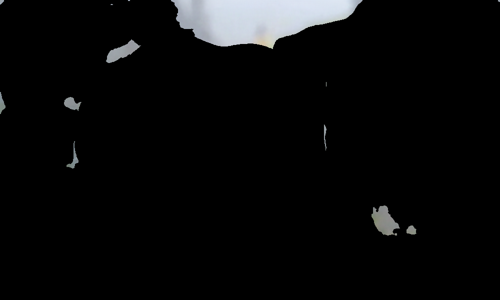

'grass'

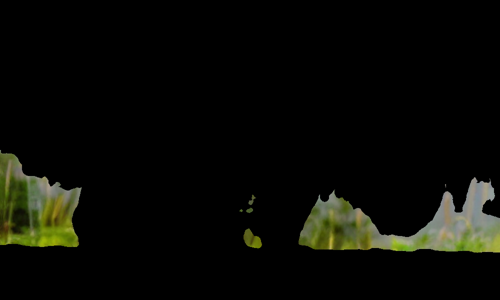

'earth, ground'

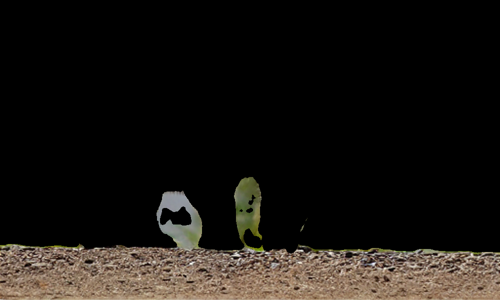

'mountain, mount'

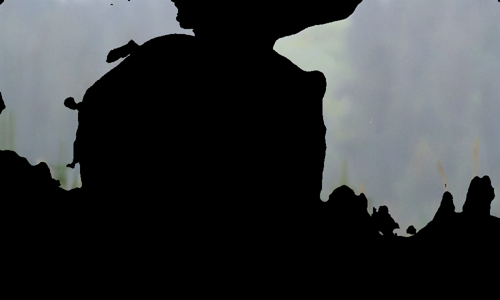

'plant'

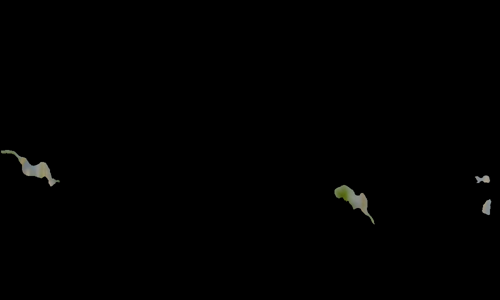

'water'

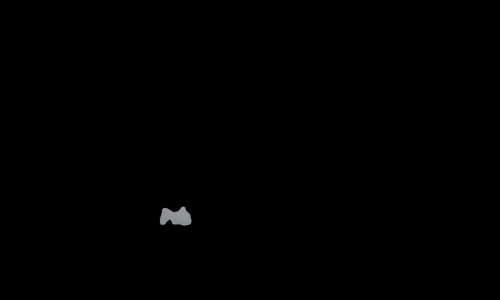

'animal'

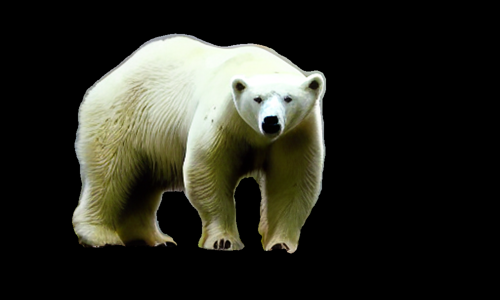

In [73]:
labels = [select.category_id_to_name[x] for x in np.unique(result.state['OBJ2'])]
display(steps[3], *sum([[label, i.resize((image.size[0] // 2, image.size[1] // 2))] for label, i in zip(labels, result.step_details[3]['output'])], []))

OBJ3 = SELECT(image=IMAGE0, object=OBJ2, query='ground', category=None)


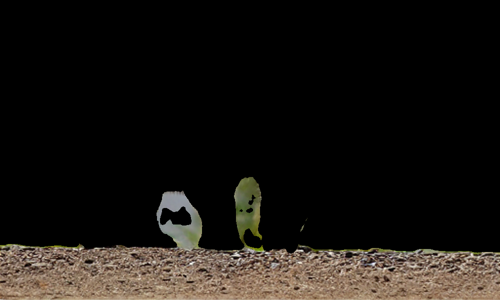

In [74]:
print(steps[4])
result.step_details[4]['output'].resize((image.size[0] // 2, image.size[1] // 2))

IMAGE1 = REPLACE(image=IMAGE0, object=OBJ3, prompt='white snow')


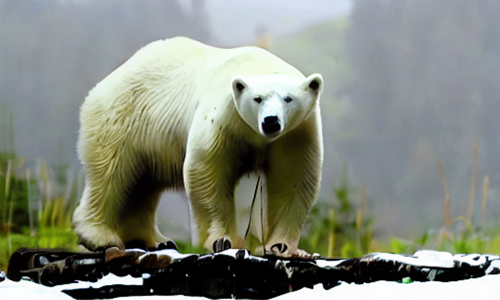

In [75]:
print(steps[5])
result.step_details[5]['output'].resize((image.size[0] // 2, image.size[1] // 2))

In [15]:
with open('assets/fig4/nlvr_prompts.yaml', 'r') as f:
  prompts = yaml.safe_load(f)

At least three animals are in a flowered field


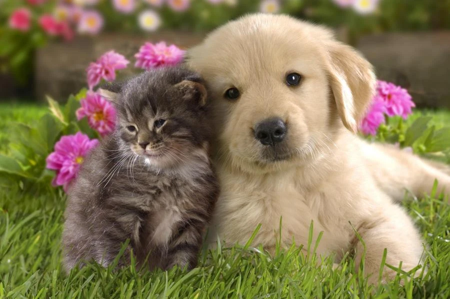

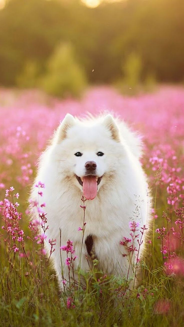

In [21]:
prompt = prompts[0]
statement = prompt['prompt']['statement']
left_image = Image.open(os.path.join(images_dir, prompt['pairs'][0]['left_image'])).convert('RGB')
right_image = Image.open(os.path.join(images_dir, prompt['pairs'][0]['right_image'])).convert('RGB')
print(statement)
display(left_image.resize((left_image.size[0] // 2, left_image.size[1] // 2)), right_image.resize((right_image.size[0] // 4, right_image.size[1] // 4)))

In [24]:
program = prompt['programs'][0]
print(program)
steps, result = do_nlvr(left_image, right_image, program)
result.output['var']

ANSWER0=VQA(image=LEFT, question='How many animals are in the flowered field?')
ANSWER1=VQA(image=RIGHT, question='How many animals are in the flowered field?')
ANSWER2=EVAL(expr='{ANSWER0} + {ANSWER1} >= 3')
FINAL_ANSWER=RESULT(var=ANSWER2)


True

In [25]:
print(steps[0])
result.step_details[0]['output']

ANSWER0=VQA(image=LEFT, question='How many animals are in the flowered field?')


2

In [27]:
print(steps[1])
result.step_details[1]['output']

ANSWER1=VQA(image=RIGHT, question='How many animals are in the flowered field?')


1

In [28]:
print(steps[2])
result.step_details[2]['output']

ANSWER2=EVAL(expr='{ANSWER0} + {ANSWER1} >= 3')


True

In [29]:
program = prompt['programs'][1]
print(program)
steps, result = do_nlvr(left_image, right_image, program)
result.output['var']

ANSWER0=VQA(image=LEFT,question='How many animals are in the image?')
ANSWER1=VQA(image=RIGHT,question='How many animals are in the image?')
ANSWER2=EVAL(expr='{ANSWER0} + {ANSWER1} >= 3')
FINAL_ANSWER=RESULT(var=ANSWER2)


True

In [30]:
print(steps[0])
result.step_details[0]['output']

ANSWER0=VQA(image=LEFT,question='How many animals are in the image?')


2

In [31]:
print(steps[1])
result.step_details[1]['output']

ANSWER1=VQA(image=RIGHT,question='How many animals are in the image?')


1

In [32]:
print(steps[2])
result.step_details[2]['output']

ANSWER2=EVAL(expr='{ANSWER0} + {ANSWER1} >= 3')


True

In [33]:
program = prompt['programs'][2]
print(program)
steps, result = do_nlvr(left_image, right_image, program)
result.output['var']

ANSWER0=VQA(image=LEFT,question='How many animals are in the flowered field?')
ANSWER1=VQA(image=RIGHT,question='How many animals are in the flowered field?')
ANSWER2=EVAL(expr='{ANSWER0} >= 3 or {ANSWER1} >= 3')
FINAL_ANSWER=RESULT(var=ANSWER2)


False

In [34]:
print(steps[0])
result.step_details[0]['output']

ANSWER0=VQA(image=LEFT,question='How many animals are in the flowered field?')


2

In [35]:
print(steps[1])
result.step_details[1]['output']

ANSWER1=VQA(image=RIGHT,question='How many animals are in the flowered field?')


1

In [36]:
print(steps[2])
result.step_details[2]['output']

ANSWER2=EVAL(expr='{ANSWER0} >= 3 or {ANSWER1} >= 3')


False